In [1]:
import numpy as np
import matplotlib.pyplot as plt
import h5py

# $Z_{\rm eff}$

In [11]:
def get_zeff(filename):
    
    
    ER = np.linspace(0,9.5*1e3,100)
    
    
    with  h5py.File('OUTPUT/Xe/'+filename,'r') as f:
        EB = f['E_B'][()]
        q = f['q_grid'][()]
        k = f['kPrime_grid'][()]
        W1 = f['Atomic_Response_W1'][0]
    
    ER_raw = k**2/2/511e3 - EB
    zlist = q[None,:-1]*W1[:,:-1]*np.diff(q)[None,:]/2/k[:,None]**2
    zeff = np.sum(zlist,axis=1)
    
    Zeff = np.interp(ER,ER_raw,zeff,left=0,right=0)
    
    return ER, Zeff
    

(0.0, 9.0)

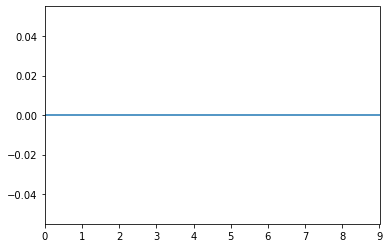

In [12]:

Zeff_all_1 = 0
for name in ['Xe1s']:
    ER,Zeff = get_zeff(name)
    Zeff_all_1 += Zeff
    
plt.plot(ER/1000,Zeff_all_1)
plt.xlim(0,9)

(0.0, 9.0)

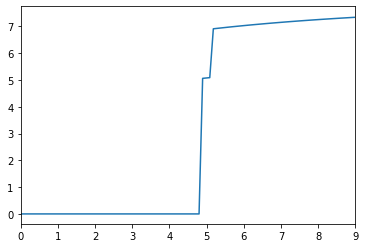

In [13]:
Zeff_all_2 = 0
for name in ['Xe2s','Xe2p']:
    ER,Zeff = get_zeff(name)
    Zeff_all_2 += Zeff
    
plt.plot(ER/1000,Zeff_all_2)
plt.xlim(0,9)

(0.0, 9.0)

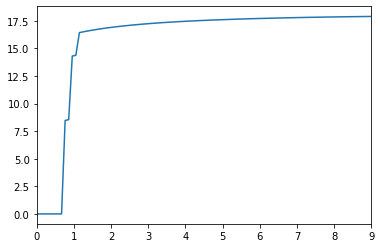

In [14]:
Zeff_all_3 = 0
for name in ['Xe3s','Xe3p','Xe3d']:
    ER,Zeff = get_zeff(name)
    Zeff_all_3 += Zeff
    
plt.plot(ER/1000,Zeff_all_3)
plt.xlim(0,9)

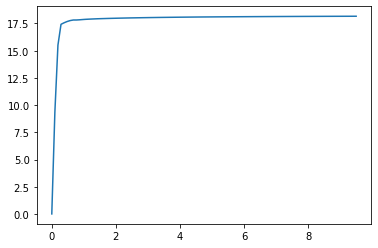

In [15]:
Zeff_all_4 = 0
for name in ['Xe4s','Xe4p','Xe4d']:
    ER,Zeff = get_zeff(name)
    Zeff_all_4 += Zeff
    
plt.plot(ER/1000,Zeff_all_4)

(0.0, 9.0)

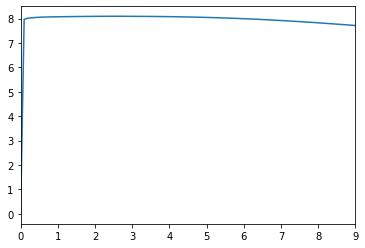

In [16]:
Zeff_all_5 = 0
for name in ['Xe5s','Xe5p']:
    ER,Zeff = get_zeff(name)
    Zeff_all_5 += Zeff
    
plt.plot(ER/1000,Zeff_all_5)
plt.xlim(0,9)

Text(0, 0.5, '$Z_{eff}$')

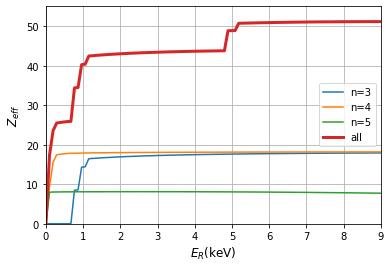

In [17]:

plt.plot(ER/1000,Zeff_all_3,label='n=3')
plt.plot(ER/1000,Zeff_all_4,label='n=4')
plt.plot(ER/1000,Zeff_all_5,label='n=5')
plt.plot(ER/1000,Zeff_all_1+Zeff_all_2+Zeff_all_3+Zeff_all_4+Zeff_all_5,linewidth=3,label='all')
plt.xlim(0,9)
plt.ylim(0,55)
plt.grid()
plt.legend()
plt.xlabel('$E_R$(keV)',size=12)
plt.ylabel('$Z_{eff}$',size=12)

# The Atomic Response

In [27]:
f = h5py.File('OUTPUT2/Xe_Ktot.hdf5','r')
ER = f['ER'][()]
Ktot = f['Ktot'][()]
q = f['q'][()]

Text(0, 0.5, 'K')

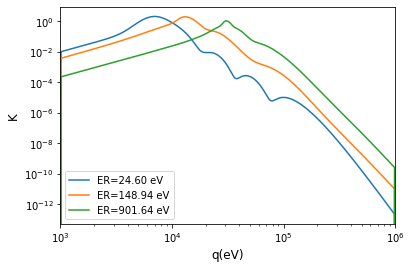

In [38]:
plt.loglog(q,Ktot[100,:],label='ER=%.2f eV'%ER[100])
plt.loglog(q,Ktot[300,:],label='ER=%.2f eV'%ER[300])
plt.loglog(q,Ktot[500,:],label='ER=%.2f eV'%ER[500])
plt.legend()
plt.xlim(1e3,1e6)
plt.xlabel('q(eV)',size=12)
plt.ylabel('K',size=12)